In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv


--2024-03-20 02:34:29--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K   228KB/s    in 0.3s    

2024-03-20 02:34:30 (228 KB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



In [3]:
df = pd.read_csv("FuelConsumption.csv")

In [4]:
df

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


In [5]:
df=df[['FUELCONSUMPTION_COMB_MPG','CO2EMISSIONS']]


In [6]:
df = df.rename(columns={'FUELCONSUMPTION_COMB_MPG':'Combustion','CO2EMISSIONS':'Emissions'})

In [7]:
df

,Combustion,Emissions
0,33,196
1,29,221
2,48,136
3,25,255
4,27,244
...,...,...
1062,24,271
1063,25,264
1064,24,271
1065,25,260


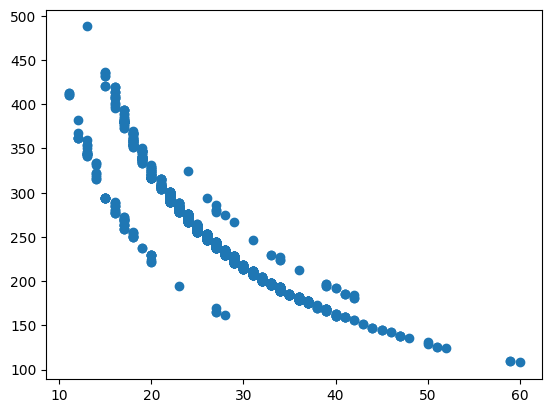

In [8]:
plt.scatter(df['Combustion'],df['Emissions'])

In [9]:
X = df.iloc[:,0:1].values
y = df.iloc[:,-1]

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [11]:
from sklearn.linear_model import LinearRegression
Lr = LinearRegression()

In [12]:
Lr.fit(X_train,y_train)

LinearRegression()

In [13]:
y_pred = Lr.predict(X_test)

In [14]:
from sklearn.metrics import mean_squared_error,r2_score



In [15]:
print("MeanSquared Error is",mean_squared_error(y_test,y_pred))

print("Root Mean Squared Error is",np.sqrt(mean_squared_error(y_test,y_pred)))

print("R2 Sore is",r2_score(y_test,y_pred))

MeanSquared Error is 733.9280959256148
Root Mean Squared Error is 27.0911073218799
R2 Sore is 0.8261445883060663


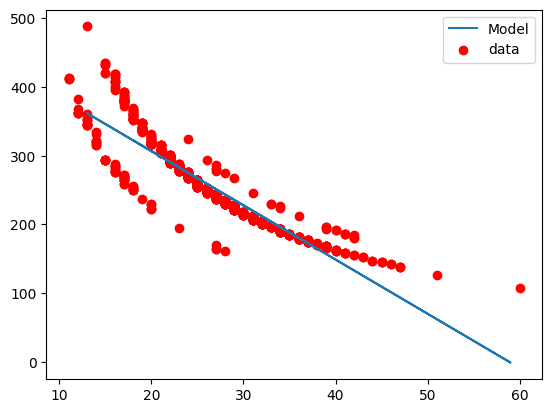

In [16]:
plt.plot(X_test,Lr.predict(X_test),label="Model")
plt.scatter(X_train,y_train,label="data", color="r")
plt.legend()
plt.show()

## Polynomial Regression

In [17]:
from sklearn.preprocessing import PolynomialFeatures

polynomial = PolynomialFeatures(degree=5)

In [18]:
X_poly = polynomial.fit_transform(X_train)
print(X_poly.shape)
X_poly

(853, 6)


array([[1.0000000e+00, 2.2000000e+01, 4.8400000e+02, 1.0648000e+04,
        2.3425600e+05, 5.1536320e+06],
       [1.0000000e+00, 1.9000000e+01, 3.6100000e+02, 6.8590000e+03,
        1.3032100e+05, 2.4760990e+06],
       [1.0000000e+00, 2.7000000e+01, 7.2900000e+02, 1.9683000e+04,
        5.3144100e+05, 1.4348907e+07],
       ...,
       [1.0000000e+00, 2.4000000e+01, 5.7600000e+02, 1.3824000e+04,
        3.3177600e+05, 7.9626240e+06],
       [1.0000000e+00, 2.1000000e+01, 4.4100000e+02, 9.2610000e+03,
        1.9448100e+05, 4.0841010e+06],
       [1.0000000e+00, 2.5000000e+01, 6.2500000e+02, 1.5625000e+04,
        3.9062500e+05, 9.7656250e+06]])

In [19]:
Lr1 = LinearRegression()

Lr1.fit(X_poly,y_train)

LinearRegression()

In [20]:
X_test_poly = polynomial.fit_transform(X_test)

In [21]:
y_pred_poly = Lr1.predict(X_test_poly)

In [22]:
print("R2 score",r2_score(y_test,y_pred))
print("MSE",np.sqrt(mean_squared_error(y_test,y_pred)))

R2 score 0.8261445883060663
MSE 27.0911073218799


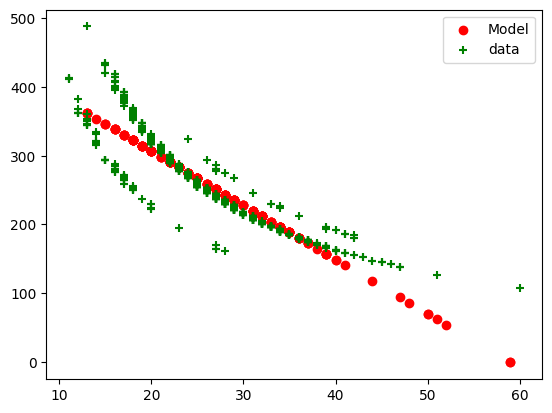

In [23]:
plt.scatter(X_test,y_pred, label="Model",color='red')
plt.scatter(X_train, y_train, label="data", marker='+',color='green')
#plt.scatter(X,y,label="Training data")
plt.legend()
plt.show()

## Defining Function for Polynomial Regression

In [24]:
def PolynomialRegression(X,y,k):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)
    polynomial = PolynomialFeatures(degree=k)
    lr = LinearRegression()
    lr.fit(X_poly,y_train)

    X_test_poly = polynomial.fit_transform(X_test)
    y_pred = lr.predict(X_test_poly)

    training_score = r2_score(y_train, lr.predict(X_poly))
    test_score = r2_score(y_test,y_pred)

    return training_score, test_score





Degree 1:
Training R2 Score: 0.824016458848968
Test R2 Score: 0.8101533206690011
-------------------------------
Degree 2:
Training R2 Score: 0.8625542069041701
Test R2 Score: 0.8036891704920761
-------------------------------
Degree 3:
Training R2 Score: 0.8502883527515172
Test R2 Score: 0.8604122659337208
-------------------------------
Degree 4:
Training R2 Score: 0.8554180438118134
Test R2 Score: 0.8714632340677184
-------------------------------
Degree 5:
Training R2 Score: 0.8623065727042117
Test R2 Score: 0.8508796602097028
-------------------------------
Degree 6:
Training R2 Score: 0.8483877035861902
Test R2 Score: 0.9066942359359839
-------------------------------
Degree 7:
Training R2 Score: 0.8584380592770638
Test R2 Score: 0.8746126874998992
-------------------------------
Degree 8:
Training R2 Score: 0.8598699794952155
Test R2 Score: 0.8643821781468469
-------------------------------
Degree 9:
Training R2 Score: 0.8519059847037378
Test R2 Score: 0.8900198737460505
-------

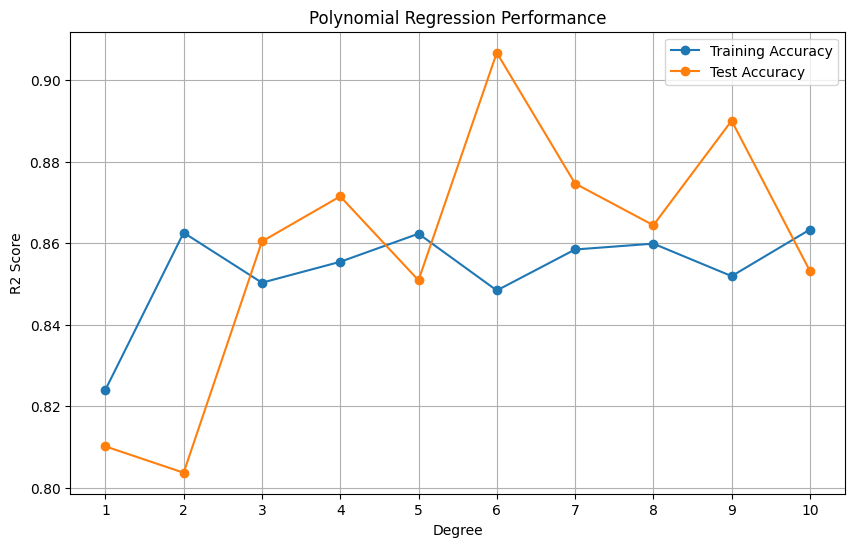

In [38]:



import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

def PolynomialRegression(X, y, k):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    polynomial = PolynomialFeatures(degree=k)

    # Transform both training and testing data
    X_train_poly = polynomial.fit_transform(X_train)
    X_test_poly = polynomial.transform(X_test)

    lr = LinearRegression()
    lr.fit(X_train_poly, y_train)

    y_pred_train = lr.predict(X_train_poly)
    y_pred_test = lr.predict(X_test_poly)

    training_score = r2_score(y_train, y_pred_train)
    test_score = r2_score(y_test, y_pred_test)

    return training_score, test_score

# Your dataset X and target variable y
# Assuming X is your feature matrix and y is your target variable

# Define a list of degrees to iterate over
degrees = [1,2,3,4,5,6,7,8,9,10]

train_scores = []
test_scores = []

for degree in degrees:
    # Call PolynomialRegression function for each degree
    training_score, test_score = PolynomialRegression(X, y, degree)

    # Store the scores
    train_scores.append(training_score)
    test_scores.append(test_score)

    # Print the results
    print(f"Degree {degree}:")
    print(f"Training R2 Score: {training_score}")
    print(f"Test R2 Score: {test_score}")
    print("-------------------------------")

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(degrees, train_scores, label='Training Accuracy', marker='o')
plt.plot(degrees, test_scores, label='Test Accuracy', marker='o')
plt.title('Polynomial Regression Performance')
plt.xlabel('Degree')
plt.ylabel('R2 Score')
plt.xticks(degrees)
plt.legend()
plt.grid(True)
plt.show()
